### Ivan David Valderrama Corredor
### Facultad de ingeniería y ciencias de la computación
### Pontificia Universidad Javeriana
### Santiago de Cali, Colombia
### ivandavid1004@javerianacali.edu.co

<center> <h1>
    Práctica 1 de Sistemas Inteligentes
</h1> </center>
<center><h2>
    Septiembre 11 de 2019
</center></h2> 


Objetivo de la práctica: 
   - Hacer el ciclo de actividades desde la carga de los datos, la construcción del clasificador y la evaluación de los resultados obtenidos.
   - Practicar las técnicas supervisadas vistas en clase.
   - Familiarizarse con las librerías requeridas para implementar proyectos de aprendizaje automático en python.

Para la primera práctica del curso de aprendizaje automático, se trabajará con un conjunto de datos que pertenece al repositorio especial de Machine Learning de la UCI. El conjunto de datos se llama "Mushroom" (https://archive.ics.uci.edu/ml/datasets/Mushroom). El archivo de datos y su descripción están en la página del curso en moodle.

En principio, se puede observar que el conjunto de datos tiene las siguientes características:
   - Atributos multivariados.
   - Atributos categóricos.
   - Resuelve un problema de clasificación.
   - 8124 Instancias.
   - 22 Atributos.
   - Hay valores faltantes.

Los datos corresponden a características de hongos para predecir si son comestibles (e=eatable) o venenosos (p=poisonous). 

Antes de iniciar la práctica se recomienda revisar el material de consulta recomendado u otro tutorial de su preferencia.
Por favor incluir en esta guía las cajas de código requeridas para realizar las siguientes actividades:


<h1>Conocer los datos</h1>

   - Cargar el archivo del conjunto de datos, usando la libería pandas. Notar que los datos están separados por comas y que los datos faltantes se marcan con un signo de interrogación. Cada línea del archivo es un ejemplo. el primer atributo es la clase a la que pertenece.
   - Identificar si hay datos faltantes y donde están: a qué atributos pertenecen, hay ejemplos a los que les faltan varios datos?
   - Eliminar los registros a los que les faltan atributos.
   - Convertir los datos categóricos a numéricos.
   - Calcular la media y desviación estandar de cada atributo.
   - Identificar datos atípicos y decidir qué hacer con ellos (eliminar el registro o modificar el dato)
   
   Insertar el código a continuación e incluir los comentarios requeridos para ir documentando cada tarea que se realiza.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import tree, linear_model, model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

lb_make = LabelEncoder()

In [2]:
#Cargar el archivo del conjunto de datos, usando la libería pandas. 
#Notar que los datos están separados por comas y que los datos faltantes se marcan con un signo de interrogación.
#Cada línea del archivo es un ejemplo. el primer atributo es la clase a la que pertenece.

data = pd.read_csv("agaricus-lepiota.data",header=None, na_values=['?'])

#data

In [3]:
#Identificar si hay datos faltantes y donde están: a qué atributos pertenecen, hay ejemplos a los que les faltan varios datos?


In [4]:
#Eliminar los registros a los que les faltan atributos.
data.dropna(inplace=True)
#data

In [5]:
#Convertir los datos categóricos a numéricos.

for i in range(0,23):
    data[i]= lb_make.fit_transform(data[i])
data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,2,...,2,5,5,0,0,1,3,1,3,5
1,0,5,2,7,1,0,1,0,0,2,...,2,5,5,0,0,1,3,2,2,1
2,0,0,2,6,1,3,1,0,0,3,...,2,5,5,0,0,1,3,2,2,3
3,1,5,3,6,1,6,1,0,1,3,...,2,5,5,0,0,1,3,1,3,5
4,0,5,2,3,0,5,1,1,0,2,...,2,5,5,0,0,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,0,0,3,4,0,5,1,0,0,7,...,3,3,3,0,0,2,3,5,5,4
8001,0,5,3,4,0,5,1,0,0,7,...,3,3,3,0,0,2,3,5,5,4
8038,0,5,3,3,1,5,1,0,0,7,...,2,5,5,0,0,2,3,5,5,4
8095,1,5,3,1,0,4,1,0,0,8,...,3,1,1,0,0,0,2,5,1,0


In [6]:
#Calcular la media y desviación estandar de cada atributo.
media=[]
desviacion=[]
for i in range(0,23):
    media.append(data[i].mean())
    desviacion.append(data[i].std())
#print(data)
print(media,chr(10))
print(desviacion)

[0.38199858256555635, 3.4202693125442947, 1.627214741318214, 4.2728561304039685, 0.5641389085754784, 3.5648476257973067, 0.9968107725017717, 0.18143160878809356, 0.12473423104181432, 3.5368532955350815, 0.5102763997165131, 0.5974486180014175, 1.5726435152374203, 1.6194188518781005, 3.9496810772501774, 3.932671863926293, 0.0, 0.001417434443656981, 1.0148830616583984, 2.0963855421686746, 1.215450035435861, 3.7129695251594614, 1.2360028348688874] 

[0.48591923260787695, 1.6596407566674574, 1.3364967666454934, 1.8380178688444158, 0.4959130710853546, 1.765805602452518, 0.05638811655837485, 0.38540952041043375, 0.33044659134809484, 2.2814282484513067, 0.49993867580986334, 0.9174121718470941, 0.6700097146140783, 0.7216202079939129, 1.5260575260819638, 1.5254016305148808, 0.0, 0.0376254721136126, 0.1655998942410756, 1.192715668311969, 1.0591251172471057, 1.3287408035875965, 1.5979809731324928]


In [7]:
#Identificar datos atípicos y decidir qué hacer con ellos (modificar el dato)
index=[]
for i in range(0,23):
    for j in range(len(data[i])):
        try:
            if(data[i][j]>media[i]+3*desviacion[i]):
                data[i][j]=media[i]
            elif(data[i][j]<media[i]-3*desviacion[i]):
                data[i][j]=media[i]
        except: continue

data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,2,...,2,5,5,0,0,1,3,1,3,5
1,0,5,2,7,1,0,1,0,0,2,...,2,5,5,0,0,1,3,2,2,1
2,0,0,2,6,1,3,1,0,0,3,...,2,5,5,0,0,1,3,2,2,3
3,1,5,3,6,1,6,1,0,1,3,...,2,5,5,0,0,1,3,1,3,5
4,0,5,2,3,0,5,1,1,0,2,...,2,5,5,0,0,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,0,0,3,4,0,5,1,0,0,7,...,3,3,3,0,0,2,3,5,5,4
8001,0,5,3,4,0,5,1,0,0,7,...,3,3,3,0,0,2,3,5,5,4
8038,0,5,3,3,1,5,1,0,0,7,...,2,5,5,0,0,2,3,5,5,4
8095,1,5,3,1,0,4,1,0,0,8,...,3,1,1,0,0,0,2,5,1,0


<h1>Preparar los datos</h1>

   - Dividir los datos en conjunto de entrenamiento y prueba (hacer una partición 70-30).

In [8]:
from sklearn.model_selection import train_test_split

y = data.pop(0)
x = data

x_train,x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size= 0.3, train_size=0.7)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(3950, 22) (3950,)
(1694, 22) (1694,)


<h1>Construir un modelo de clasificación mediante el método de regresión logística</h1>

   - Construir un modelo de regresión logística a partir del conjunto de entrenamiento.
   - Probar el modelo usándolo para clasificar los ejemplos del conjunto de test.
   - Obtener la matriz de confusión, precision, recall y score F1 para los resultados obtenidos.

Me base en la siguiente página:
https://www.aprendemachinelearning.com/regresion-logistica-con-python-paso-a-paso/

In [9]:
#Punto 1
#Construir un modelo de regresión logística a partir del conjunto de entrenamiento.
modelo = linear_model.LogisticRegression()
modelo.fit(x,y)

#print(model.score(x,y))

archivo = model_selection.KFold(n_splits=10, random_state=0)
resultado = model_selection.cross_val_score(modelo, x_train, y_train, cv=archivo, scoring='accuracy')
#print('Regresión Logística', resultado.mean(), resultado.std())

prediccion = modelo.predict(x_train)
print("Precisión del modelo de regresión logística en el conjunto de entrenamiento:",accuracy_score(y_train, prediccion))


Precisión del modelo de regresión logística en el conjunto de entrenamiento: 0.9655696202531645


In [10]:
#Punto 2
#Probar el modelo usándolo para clasificar los ejemplos del conjunto de test.
prediccion = modelo.predict(x_test)
print("Precisión del modelo de regresión logística en el conjunto de test:",accuracy_score(y_test, prediccion))

Precisión del modelo de regresión logística en el conjunto de test: 0.9622195985832349


In [11]:
#Punto 3
#Obtener la matriz de confusión, precision, recall y score F1 para los resultados obtenidos.
print("Matriz de Confusión",chr(10),confusion_matrix(y_test, prediccion),chr(10))
print(classification_report(y_test, prediccion))

Matriz de Confusión 
 [[1036   17]
 [  47  594]] 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1053
           1       0.97      0.93      0.95       641

    accuracy                           0.96      1694
   macro avg       0.96      0.96      0.96      1694
weighted avg       0.96      0.96      0.96      1694



<h1>Construir un modelo de clasificación mediante el método de los k vecinos más cercanos</h1>

   - Aplicar la técnica de los k-vecinos usando k=3 para los datos del conjunto de test.
   - Obtener la matriz de confusión, precision, recall y score F1 para los resultados obtenidos.
   - Estimar el valor más recomendable de k para este problema: probar sistemáticamente con los valores de k= 1...20 y graficar el resultado de accuracy para cada uno de ellos.

Me base en la siguiente página:
https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/

In [13]:
#Punto 1
# Aplicar la técnica de los k-vecinos usando k=3 para los datos del conjunto de test.
k_vecinos = 3
 
knn = KNeighborsClassifier(k_vecinos)
knn.fit(x_train, y_train)
print("Precisión del clasificador K-NN en el conjunto de entrenamiento:",knn.score(x_train, y_train))
print("Precisión del clasificador K-NN en el conjunto de prueba:",knn.score(x_test, y_test))

Precisión del clasificador K-NN en el conjunto de entrenamiento: 1.0
Precisión del clasificador K-NN en el conjunto de prueba: 0.9988193624557261


In [14]:
#Punto 2
#Obtener la matriz de confusión, precision, recall y score F1 para los resultados obtenidos.
prediccion = knn.predict(x_test)
print("Matriz de Confusión",chr(10),confusion_matrix(y_test, prediccion),chr(10))
print(classification_report(y_test, prediccion))

Matriz de Confusión 
 [[1053    0]
 [   2  639]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1053
           1       1.00      1.00      1.00       641

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694



([<matplotlib.axis.XTick at 0x7fc37faa1a20>,
 <a list of 5 Text xticklabel objects>)

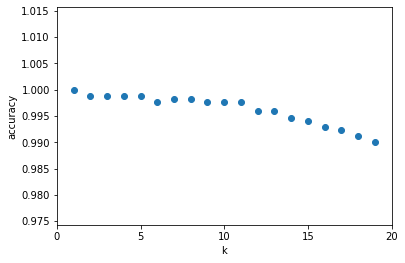

In [16]:
#Punto 3
#Estimar el valor más recomendable de k para este problema: probar sistemáticamente con los valores de k= 1...20 y 
#graficar el resultado de accuracy para cada uno de ellos.
rangoK = range(1, 20)
accuracy = []
for k in rangoK:
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    accuracy.append(knn.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(rangoK, accuracy)
plt.xticks([0,5,10,15,20])

Como podemos ver en la gráfica el valor más recomendable de k para este problema es k = 1 .

<h1>Análisis de los resultados y Conclusiones</h1>

   - Escribir a continuación el resultado del análisis para el método de regresión logística.
   - Escribir el resultado del análisis para el método de los k-vecinos más cercanos.
   - Escribir el resultado de comparar ambas técnicas en esta tarea particular.


### Respuesta:

- Método de regresión logística
La implementación de este método se hace posible debido a que debemos clasificar resultados en valores discretos. Si tuviéramos que predecir valores continuos, debemos aplicar Regresión Lineal.

Como podemos ver en el modelo de regresión logística, la precisión del conjunto de test fue de un 96% que es un valor muy bueno, lo que nos permitirá predecir los datos verdaderos y los datos que son realmente falsos.
En el recall se catalogaron alrededor del 98% de los datos, lo que nos indica un alto grado de clasificación, pues solo el 2% de los datos fueron mal catalogados. También podemos ver que en la clase 1 el 93% de los datos fueron catalogados sin problemas, tan solo el 7% de los datos están mal catalogados.

En general, podemos inferir que el agente computacional cumple con un alto grado de rigurosidad el problema de clasificación y por ende ha aprendido con una precisión del 96%.

- Método K-vecinos más cercanos

Al ser un algoritmo supervisado, debemos contar con suficientes muestras etiquetadas para poder entrenar el modelo con buenos resultados.
Además necesitamos muchos recursos de memoria y cpu para mantener el dataset «vivo» y evaluar nuevos puntos.

Como podemos ver, en el método de los k-vecinos más cercanos; contamos con una precisión del conjunto de test alrededor del 100% (99.88 para ser más precisos), el cual es un valor muy confiable, que a pesar del costo que implica utilizarlo en varias áreas como la medicina, la biología e incluso en el área de la construcción que pueden necesitar tal grado de precisión.
En el recall se catalogaron los datos en tu totalidad (100%) tanto en la categoría 0 como la 1.

- Ambas técnicas

En conclusión dependiendo de la necesidad del investigador, se puede emplear uno de los 2 métodos.
El método de regresión logística aprovecha mejor los recursos, sin embargo en cuanto a la precisión y el recall no son tan buenos como el método de k-vecinos más cercanos.